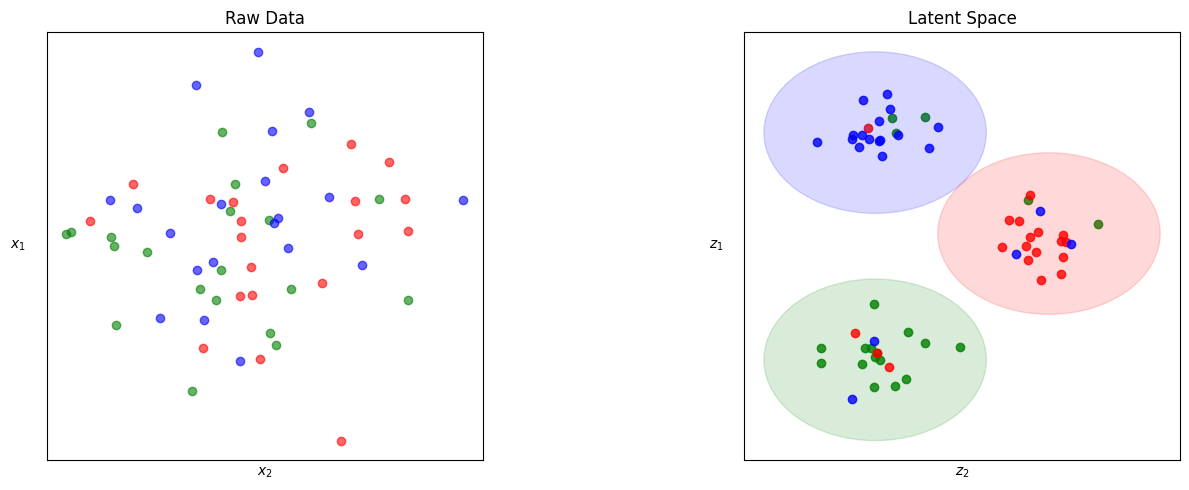

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

np.random.seed(42)
n_points = 20

# Raw data: 3 scattered, overlapping clusters (x1, x2)
raw_centers = np.array([[1, 1], [4, 4], [7, 1]])
raw_data = []
raw_labels = []

for i, center in enumerate(raw_centers):
    points = center + np.random.randn(n_points, 2) * 10.5  # scattered
    raw_data.append(points)
    raw_labels.append(np.full(n_points, i))

raw_data = np.vstack(raw_data)
raw_labels = np.concatenate(raw_labels)

# Introduce clustering mistakes in raw data by swapping labels for a few points
mistake_indices = []
for i in range(3):
    cluster_indices = np.where(raw_labels == i)[0]
    n_mistakes = 3
    chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
    mistake_indices.extend(chosen)

for idx in mistake_indices:
    original_label = raw_labels[idx]
    new_label = (original_label + 1) % 3
    raw_labels[idx] = new_label

# Latent space: tighter, closer clusters with mistakes
latent_centers = np.array([[0, 0], [5, 5], [9, 0]])
latent_data = []
latent_labels = []

for i, center in enumerate(latent_centers):
    points = center + np.random.randn(n_points, 2) * 0.8
    latent_data.append(points)
    latent_labels.append(np.full(n_points, i))

latent_data = np.vstack(latent_data)
latent_labels = np.concatenate(latent_labels)

# Swap axes for Z2 horizontal

# Bring clusters closer on horizontal axis (Z2)
#latent_data[30:60, 1] -= 1.5
#latent_data[60:90, 1] -= 3.0

# Introduce mistakes in latent labels
latent_mistakes = []
for i in range(3):
    cluster_indices = np.where(latent_labels == i)[0]
    n_mistakes = 3
    chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
    latent_mistakes.extend(chosen)

for idx in latent_mistakes:
    original_label = latent_labels[idx]
    new_label = (original_label + 1) % 3
    latent_labels[idx] = new_label

latent_mistakes = []
for i in range(2):
    cluster_indices = np.where(latent_labels == i)[0]
    n_mistakes = 2
    chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
    latent_mistakes.extend(chosen)

for idx in latent_mistakes:
    original_label = latent_labels[idx]
    new_label = (original_label + 2) % 3
    latent_labels[idx] = new_label

latent_mistakes = []
i = 2
cluster_indices = np.where(latent_labels == i)[0]
n_mistakes = 1
chosen = np.random.choice(cluster_indices, n_mistakes, replace=False)
latent_mistakes.extend(chosen)

for idx in latent_mistakes:
    original_label = latent_labels[idx]
    new_label = (original_label + 2) % 3
    latent_labels[idx] = new_label

colors = ['green', 'red', 'blue']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot raw data (x2 horizontal)
for i, color in enumerate(colors):
    subset = raw_data[raw_labels == i]
    axes[0].scatter(subset[:, 1], subset[:, 0], color=color, alpha=0.6)

axes[0].set_title('Raw Data')
axes[0].set_xlabel('$x_2$')
axes[0].set_ylabel('$x_1$', rotation=0, va='center', ha='right', labelpad=15)
axes[0].set_xticks([])
axes[0].set_yticks([])
axes[0].grid(False)

# Plot latent space (Z2 horizontal)
for i, color in enumerate(colors):
    subset = latent_data[latent_labels == i]
    axes[1].scatter(subset[:, 1], subset[:, 0], color=color, alpha=0.8)
    # Add translucent circle around each cluster center (latent centers swapped axes)
    center_x, center_y = latent_centers[i][1], latent_centers[i][0]  # swapped axes
    circle = Circle((center_x, center_y), radius=3.2, color=color, alpha=0.15)
    axes[1].add_patch(circle)

axes[1].set_title('Latent Space')
axes[1].set_xlabel('$z_2$')
axes[1].set_ylabel('$z_1$', rotation=0, va='center', ha='right', labelpad=15)
axes[1].set_xticks([])
axes[1].set_yticks([])
axes[1].grid(False)

plt.tight_layout()
fig.subplots_adjust(wspace=0.6)  # increase horizontal space between plots

plt.show()


In [ ]:
plt.savefig('raw_data.png')
plt.savefig('latent_space.png')


In [5]:
ids_to_names_dict = {
    "1480": "Ilpd",
    "458": "Analcatdata_authorship",
    "469": "Analcatdata_dmft",
    "11": "Balance-scale",
    "23": "Cmc",
    "37": "Diabetes",
    "1067": "Kc1",
    "1063": "Kc2",
    "1068": "Pc1",
    "1050": "Pc3",
    "1049": "Pc4",
    "1464": "Blood-transfusion",
    "40975": "Car",
    "40982": "Steel-plates-fault",
    "1510": "Wdbc",
    "40994": "Climate-model"
}


In [ ]:
import os
import json
import pandas as pd


config_path = "../data/misc/dataset_config.json"   # should contain mapping {dataset_id: {"name": "Dataset Name"}}
input_dir = "../data/preprocessed"
output_dir = "../data/misc"

with open(config_path, "r") as f:
    configs = json.load(f)

dataset_table = []

for dataset_id, _ in configs.items():
    print(f"🔄 Processing dataset {dataset_id}...")

    METADATA_PATH = os.path.join(input_dir, dataset_id, "metadata.json")
    if not os.path.exists(METADATA_PATH):
        print(f"⚠️ No metadata.json found for {dataset_id}, skipping...")
        continue

    with open(METADATA_PATH, "r") as f:
        metadata = json.load(f)

    row = {
        "openml_id": dataset_id,
        "name": ids_to_names_dict[dataset_id],
        "num_samples": metadata["num_samples"],
        "num_features": metadata["num_og_columns"],
        "num_numerical_features": metadata["num_numerical_features"],
        "num_categorical_features": metadata["num_categorical_features"],
        "num_clusters": metadata["num_clusters"],
        "f_s_ratio": metadata["f_s_ratio"],
    }

    dataset_table.append(row)
    
dataset_table = sorted(dataset_table, key=lambda x: int(x["openml_id"]))
OUTPUT_PATH = os.path.join(output_dir, "dataset_table.json")
with open(OUTPUT_PATH, "w") as f:
    json.dump(dataset_table, f, indent=4)

print(f"✅ Dataset table saved to '{OUTPUT_PATH}'")

# turn into DataFrame
df = pd.DataFrame(dataset_table)


🔄 Processing dataset 1480...
🔄 Processing dataset 458...
🔄 Processing dataset 469...
🔄 Processing dataset 11...
🔄 Processing dataset 23...
🔄 Processing dataset 37...
🔄 Processing dataset 1067...
🔄 Processing dataset 1063...
🔄 Processing dataset 1068...
🔄 Processing dataset 1050...
🔄 Processing dataset 1049...
🔄 Processing dataset 1464...
🔄 Processing dataset 40975...
🔄 Processing dataset 40982...
🔄 Processing dataset 1510...
🔄 Processing dataset 40994...
✅ Dataset table saved to '../data/misc\dataset_table.json'


In [11]:
df

,openml_id,name,num_samples,num_features,num_numerical_features,num_categorical_features,num_clusters,f_s_ratio
0,11,Balance-scale,625,4,4,0,3,0.640
1,23,Cmc,1473,9,2,7,3,0.611
2,37,Diabetes,768,8,8,0,2,1.042
3,458,Analcatdata_authorship,841,70,69,1,4,8.323
4,469,Analcatdata_dmft,797,4,0,4,6,0.502
5,1049,Pc4,1458,37,37,0,2,2.538
6,1050,Pc3,1563,37,37,0,2,2.367
7,1063,Kc2,522,21,21,0,2,4.023
8,1067,Kc1,2109,21,21,0,2,0.996
9,1068,Pc1,1109,21,21,0,2,1.894


In [ ]:
config_path = "../data/misc/dataset_config.json"   # should contain mapping {dataset_id: {"name": "Dataset Name"}}
input_dir = "../data/preprocessed"
output_dir = "../data/misc"

with open(config_path, "r") as f:
    configs = json.load(f)

dataset_table = []

for dataset_id, _ in configs.items():
    print(f"🔄 Processing dataset {dataset_id}...")

    METADATA_PATH = os.path.join(input_dir, dataset_id, "metadata.json")
    if not os.path.exists(METADATA_PATH):
        print(f"⚠️ No metadata.json found for {dataset_id}, skipping...")
        continue

    with open(METADATA_PATH, "r") as f:
        metadata = json.load(f)

    row = {
        "openml_id": f"{dataset_id}",
        "name": ids_to_names_dict[dataset_id],
        "num_samples": metadata["num_samples"],
        "num_features": metadata["num_og_columns"],
        "num_numerical_features": metadata["num_numerical_features"],
        "num_categorical_features": metadata["num_categorical_features"],
        "num_clusters": metadata["num_clusters"],
        "f_s_ratio": metadata["f_s_ratio"],
    }

    dataset_table.append(row)
    
dataset_table = sorted(dataset_table, key=lambda x: int(x["openml_id"]))
OUTPUT_PATH = os.path.join(output_dir, "clutad/balanced/balanced_dataset_table.json")
with open(OUTPUT_PATH, "w") as f:
    json.dump(dataset_table, f, indent=4)

print(f"✅ Dataset table saved to '{OUTPUT_PATH}'")

# turn into DataFrame
df = pd.DataFrame(dataset_table)


🔄 Processing dataset 1480...
🔄 Processing dataset 458...
⚠️ No metadata.json found for 458, skipping...
🔄 Processing dataset 469...
⚠️ No metadata.json found for 469, skipping...
🔄 Processing dataset 11...
⚠️ No metadata.json found for 11, skipping...
🔄 Processing dataset 23...
⚠️ No metadata.json found for 23, skipping...
🔄 Processing dataset 37...
🔄 Processing dataset 1067...
🔄 Processing dataset 1063...
🔄 Processing dataset 1068...
🔄 Processing dataset 1050...
🔄 Processing dataset 1049...
🔄 Processing dataset 1464...
🔄 Processing dataset 40975...
⚠️ No metadata.json found for 40975, skipping...
🔄 Processing dataset 40982...
⚠️ No metadata.json found for 40982, skipping...
🔄 Processing dataset 1510...
🔄 Processing dataset 40994...
✅ Dataset table saved to '../data/misc\clutad/balanced/balanced_dataset_table.json'


In [13]:
df

,openml_id,name,num_samples,num_features,num_numerical_features,num_categorical_features,num_clusters,f_s_ratio
0,37,Diabetes,536,8,8,0,2,1.493
1,1049,Pc4,356,37,37,0,2,10.393
2,1050,Pc3,320,37,37,0,2,11.562
3,1063,Kc2,214,21,21,0,2,9.813
4,1067,Kc1,652,21,21,0,2,3.221
5,1068,Pc1,154,21,21,0,2,13.636
6,1464,Blood-transfusion,356,4,4,0,2,1.124
7,1480,Ilpd,334,10,9,1,2,2.994
8,1510,Wdbc,424,30,30,0,2,7.075
9,40994,Climate-model,92,20,20,0,2,21.739


In [ ]:
cluster_table = {}

for dataset_id, name in ids_to_names_dict.items():
    print(f"🔄 Processing dataset {dataset_id}...")

    metadata_path = os.path.join(input_dir, dataset_id, "metadata.json")
    if not os.path.exists(metadata_path):
        print(f"⚠️ No metadata.json found for {dataset_id}, skipping...")
        continue

    with open(metadata_path, "r") as f:
        metadata = json.load(f)

    # collect cluster distribution
    clusters_path = os.path.join(input_dir, dataset_id, "clusters.csv")
    if os.path.exists(clusters_path):
        df = pd.read_csv(clusters_path)
        col = df.columns[0]
        dist = df[col].value_counts(normalize=True).to_dict()
        dist = {str(k): round(v, 3) for k, v in dist.items()}  # round to 3 digits and stringify keys
        cluster_table[dataset_id] = dist
    else:
        print(f"⚠️ No preprocessed.csv found for {dataset_id}, skipping cluster distribution...")

# sort dataset table by id
cluster_table = {k: cluster_table[k] for k in sorted(cluster_table, key=lambda x: int(x))}

os.makedirs(output_dir, exist_ok=True)

# save cluster distributions (weights)
cluster_path = os.path.join(output_dir, "cluster_distributions.json")
with open(cluster_path, "w") as f:
    json.dump(cluster_table, f, indent=4)

print(f"✅ Saved cluster distributions → {cluster_path}")


🔄 Processing dataset 1480...
🔄 Processing dataset 458...
🔄 Processing dataset 469...
🔄 Processing dataset 11...
🔄 Processing dataset 23...
🔄 Processing dataset 37...
🔄 Processing dataset 1067...
🔄 Processing dataset 1063...
🔄 Processing dataset 1068...
🔄 Processing dataset 1050...
🔄 Processing dataset 1049...
🔄 Processing dataset 1464...
🔄 Processing dataset 40975...
🔄 Processing dataset 40982...
🔄 Processing dataset 1510...
🔄 Processing dataset 40994...
✅ Saved cluster distributions → ../data/misc\cluster_distributions.json


In [5]:
cluster_table

{'11': {'R': 0.461, 'L': 0.461, 'B': 0.078},
 '23': {'1': 0.427, '3': 0.347, '2': 0.226},
 '37': {'tested_negative': 0.651, 'tested_positive': 0.349},
 '458': {'Austen': 0.377,
  'London': 0.352,
  'Shakespeare': 0.206,
  'Milton': 0.065},
 '469': {'Mouthwash': 0.234,
  'Diet_enrichment': 0.2,
  'All_methods': 0.192,
  'Health_education': 0.188,
  'Oral_hygiene': 0.186},
 '1049': {'False': 0.878, 'True': 0.122},
 '1050': {'False': 0.898, 'True': 0.102},
 '1063': {'no': 0.795, 'yes': 0.205},
 '1067': {'False': 0.845, 'True': 0.155},
 '1068': {'False': 0.931, 'True': 0.069},
 '1464': {'1': 0.762, '2': 0.238},
 '1480': {'1': 0.714, '2': 0.286},
 '1510': {'1': 0.627, '2': 0.373},
 '40975': {'unacc': 0.7, 'acc': 0.222, 'good': 0.04, 'vgood': 0.038},
 '40982': {'Other_Faults': 0.347,
  'Bumps': 0.207,
  'K_Scratch': 0.201,
  'Z_Scratch': 0.098,
  'Pastry': 0.081,
  'Stains': 0.037,
  'Dirtiness': 0.028},
 '40994': {'1': 0.915, '0': 0.085}}

In [6]:
# maximum number of clusters across all datasets
max_clusters = max(len(d) for d in cluster_table.values())

rows = []
for dataset_id, dist in cluster_table.items():
    # sort cluster proportions descending
    values = sorted(dist.values(), reverse=True)
    # pad with dashes
    while len(values) < max_clusters:
        values.append("-")
    rows.append([dataset_id] + values)

# create DataFrame
columns = ["dataset_id"] + [f"cluster{i+1}" for i in range(max_clusters)]
df = pd.DataFrame(rows, columns=columns)

# sort by dataset_id numeric
df["dataset_id"] = df["dataset_id"].astype(int)
df = df.sort_values("dataset_id").reset_index(drop=True)

print(df)

    dataset_id  cluster1  cluster2 cluster3 cluster4 cluster5 cluster6  \
0           11     0.461     0.461    0.078        -        -        -   
1           23     0.427     0.347    0.226        -        -        -   
2           37     0.651     0.349        -        -        -        -   
3          458     0.377     0.352    0.206    0.065        -        -   
4          469     0.234     0.200    0.192    0.188    0.186        -   
5         1049     0.878     0.122        -        -        -        -   
6         1050     0.898     0.102        -        -        -        -   
7         1063     0.795     0.205        -        -        -        -   
8         1067     0.845     0.155        -        -        -        -   
9         1068     0.931     0.069        -        -        -        -   
10        1464     0.762     0.238        -        -        -        -   
11        1480     0.714     0.286        -        -        -        -   
12        1510     0.627     0.373    

In [7]:
# save to CSV / JSON
cluster_dist_path = os.path.join(output_dir, "cluster_distribution_table.csv")
df.to_csv(cluster_dist_path, index=False)


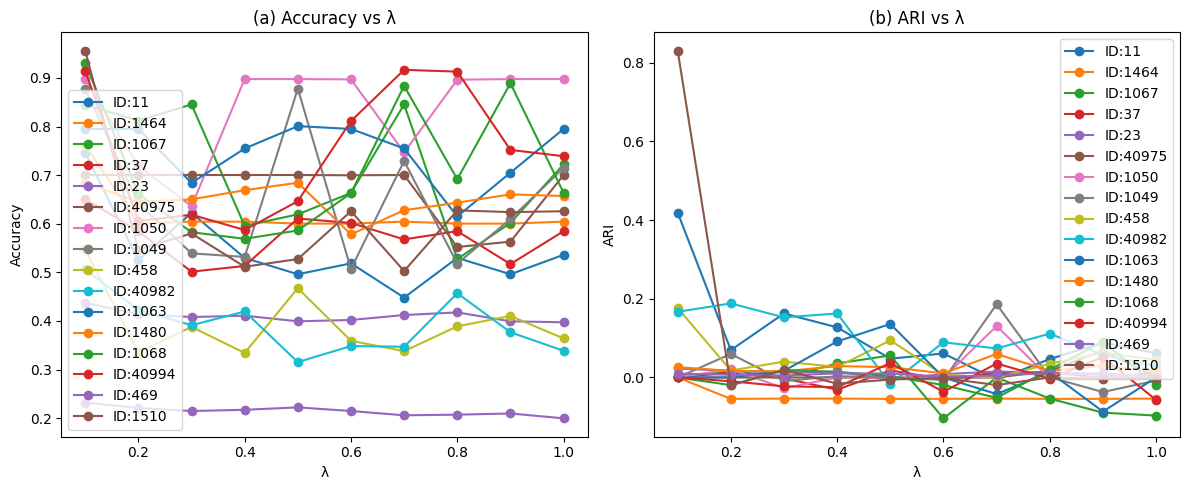

In [6]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
input_dir = "../data/results"
LAMBDA_PATH = os.path.join(input_dir, "clutad/clutad_lambda_results.json")
ALL_PATH = os.path.join(input_dir, "clutad/clutad_results_filtered.json")
# Load the two JSON files
with open(LAMBDA_PATH) as f:
    data_lambda = json.load(f)

with open(ALL_PATH) as f:
    data_final = json.load(f)

# Convert to DataFrames
df_lambda = pd.DataFrame(data_lambda)
df_final = pd.DataFrame(data_final)

# --- Normalize dataset_index ---
df_lambda["dataset_index"] = df_lambda["dataset_index"].astype(str).str.replace("l", "")
df_final["dataset_index"] = df_final["dataset_index"].astype(str)

# Add lambda=0.1 column to df_final
df_final["lambda"] = 0.1

# Keep only dataset IDs present in both
common_ids = set(df_lambda["dataset_index"].unique()) & set(df_final["dataset_index"].unique())
df_lambda = df_lambda[df_lambda["dataset_index"].isin(common_ids)]
df_final = df_final[df_final["dataset_index"].isin(common_ids)]

# Merge the two datasets
df_all = pd.concat([df_final, df_lambda], ignore_index=True)

# --- Plot Accuracy vs λ ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for ds in common_ids:
    sub = df_all[df_all["dataset_index"] == ds].sort_values("lambda")
    plt.plot(sub["lambda"], sub["accuracy"], marker="o", label=f"ID:{ds}")
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.title("(a) Accuracy vs λ")
plt.legend()

# --- Plot ARI vs λ ---
plt.subplot(1, 2, 2)
for ds in common_ids:
    sub = df_all[df_all["dataset_index"] == ds].sort_values("lambda")
    plt.plot(sub["lambda"], sub["ari"], marker="o", label=f"ID:{ds}")
plt.xlabel("λ")
plt.ylabel("ARI")
plt.title("(b) ARI vs λ")
plt.legend()

plt.tight_layout()
plt.show()


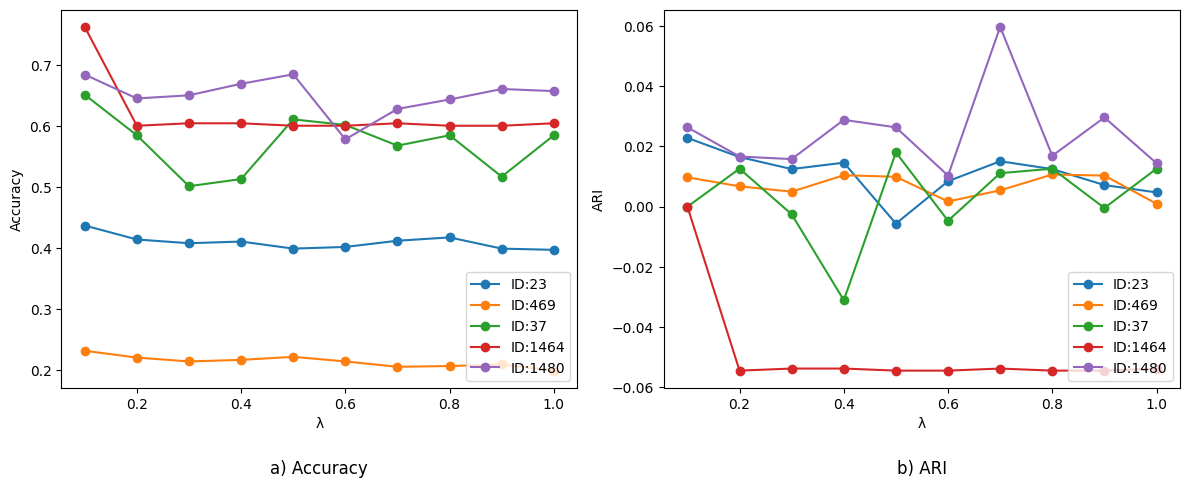

In [14]:
import json
import os
import matplotlib.pyplot as plt
import pandas as pd

input_dir = "../data/results"
LAMBDA_PATH = os.path.join(input_dir, "clutad/clutad_lambda_results.json")
ALL_PATH = os.path.join(input_dir, "clutad/clutad_results_filtered.json")

# Load the two JSON files
with open(LAMBDA_PATH) as f:
    data_lambda = json.load(f)

with open(ALL_PATH) as f:
    data_final = json.load(f)

# Convert to DataFrames
df_lambda = pd.DataFrame(data_lambda)
df_final = pd.DataFrame(data_final)

# --- Normalize dataset_index ---
df_lambda["dataset_index"] = df_lambda["dataset_index"].astype(str).str.replace("l", "")
df_final["dataset_index"] = df_final["dataset_index"].astype(str)

# Add lambda=0.1 column to df_final
df_final["lambda"] = 0.1

# Keep only dataset IDs of interest
common_ids = ["23", "469", "37", "1464", "1480"]
df_lambda = df_lambda[df_lambda["dataset_index"].isin(common_ids)]
df_final = df_final[df_final["dataset_index"].isin(common_ids)]

# Merge the two datasets
df_all = pd.concat([df_final, df_lambda], ignore_index=True)

# --- Plot Accuracy vs λ ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for ds in common_ids:
    sub = df_all[df_all["dataset_index"] == ds].sort_values("lambda")
    plt.plot(sub["lambda"], sub["accuracy"], marker="o", label=f"ID:{ds}")
plt.xlabel("λ")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")
# Move title below plot
plt.title("a) Accuracy", y=-0.25)

# --- Plot ARI vs λ ---
plt.subplot(1, 2, 2)
for ds in common_ids:
    sub = df_all[df_all["dataset_index"] == ds].sort_values("lambda")
    plt.plot(sub["lambda"], sub["ari"], marker="o", label=f"ID:{ds}")
plt.xlabel("λ")
plt.ylabel("ARI")
plt.legend(loc="lower right")
plt.title("b) ARI", y=-0.25)

plt.tight_layout()
plt.show()
